In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats


In [4]:
Town = pd.read_excel("Town.xlsx", sheet_name='Passenger Arrival Time')
Kabuga = pd.read_excel('Kabuga.xls', sheet_name='Passenger Arrival Time')
Zindiro = pd.read_excel('Zindiro.xlsx', sheet_name='Passenger Arrival Time')

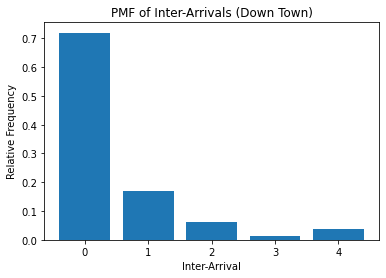

The p-value for Town is: 2.1310947902300424e-21


In [5]:
#CHECKING THE DISTRIBUTION OF INTER ARRIVAL TIME FOR TOWN

inter_arrival_relative_freq = Town['Inter Arrival Time'].value_counts(normalize=True)
pmf_inter_arrival_town = pd.DataFrame(inter_arrival_relative_freq)
pmf_inter_arrival_town = pmf_inter_arrival_town.reset_index().rename(columns={'index':'Inter Arrival Time', 'Inter Arrival Time' : "Freq"} )

n_bins3 = plt.bar(pmf_inter_arrival_town['Inter Arrival Time'], pmf_inter_arrival_town['Freq'])

plt.ylabel("Relative Frequency")
plt.xlabel("Inter-Arrival")
plt.title("PMF of Inter-Arrivals (Down Town)")
plt.show()

# TESTING CHI SQUARE GOODNESS OF FIT TO CONFIRM EXPONENTIAL 
# INTER ARRIVAL OR NOT
town_expected = np.random.exponential(2.0769, 82)
town_chi_square = stats.chisquare(f_obs=Town['Inter Arrival Time'], f_exp=town_expected)
print("The p-value for Town is: " + str(town_chi_square[1]))

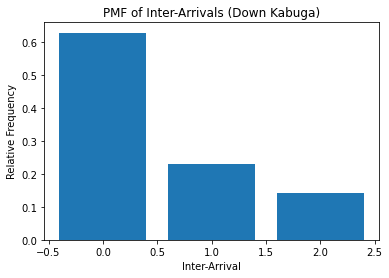

The p-value for Kabuga is: 0.1153100230042019


In [6]:
#CHECKING THE DISTRIBUTION OF INTER ARRIVAL TIME FOR KABUGA

inter_arrival_relative_freq = Kabuga['Inter Arrival Time'].value_counts(normalize=True)
pmf_inter_arrival_Kabuga = pd.DataFrame(inter_arrival_relative_freq)
pmf_inter_arrival_Kabuga = pmf_inter_arrival_Kabuga.reset_index().rename(columns={'index':'Inter Arrival Time', 'Inter Arrival Time' : "Freq"} )

n_bins3 = plt.bar(pmf_inter_arrival_Kabuga['Inter Arrival Time'], pmf_inter_arrival_Kabuga['Freq'])

plt.ylabel("Relative Frequency")
plt.xlabel("Inter-Arrival")
plt.title("PMF of Inter-Arrivals (Down Kabuga)")
plt.show()

# TESTING CHI SQUARE GOODNESS OF FIT TO CONFIRM EXPONENTIAL 
# INTER ARRIVAL OR NOT
Kabuga_expected = np.random.exponential(1.7, 35)
Kabuga_chi_square = stats.chisquare(f_obs=Kabuga['Inter Arrival Time'], f_exp=Kabuga_expected)
print("The p-value for Kabuga is: " + str(Kabuga_chi_square[1]))

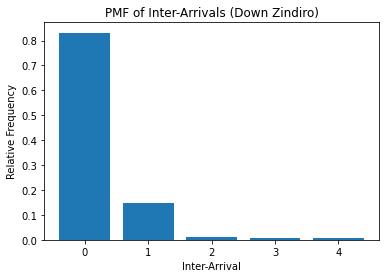

The p-value for Zindiro is: 3.6278119971385657e-47


In [7]:
#CHECKING THE DISTRIBUTION OF INTER ARRIVAL TIME FOR ZINDIRO

inter_arrival_relative_freq = Zindiro['Inter Arrival Time'].value_counts(normalize=True)
pmf_inter_arrival_Zindiro = pd.DataFrame(inter_arrival_relative_freq)
pmf_inter_arrival_Zindiro = pmf_inter_arrival_Zindiro.reset_index().rename(columns={'index':'Inter Arrival Time', 'Inter Arrival Time' : "Freq"} )

n_bins3 = plt.bar(pmf_inter_arrival_Zindiro['Inter Arrival Time'], pmf_inter_arrival_Zindiro['Freq'])

plt.ylabel("Relative Frequency")
plt.xlabel("Inter-Arrival")
plt.title("PMF of Inter-Arrivals (Down Zindiro)")
plt.show()

# TESTING CHI SQUARE GOODNESS OF FIT TO CONFIRM EXPONENTIAL 
# INTER ARRIVAL OR NOT
Zindiro_expected = np.random.exponential(0.2, 190)
Zindiro_chi_square = stats.chisquare(f_obs=Zindiro['Inter Arrival Time'], f_exp=Zindiro_expected)
print("The p-value for Zindiro is: " + str(Zindiro_chi_square[1]))

In [8]:
# CALCULATION OF AVERAGE WAITING TIME TOWN
no_seats = 220
journey_time = 40+35
serv_time = journey_time / no_seats
serv_rate = 1/serv_time
arr_rate = 2.0769
c = 1
c_1 = math.factorial(c)
p = arr_rate / (c * serv_rate)


sum_ = 0
for m in range(c):
    m_1 = math.factorial(m)
    term1 = ((c*p)**m)/m_1
    term2 = ((c*p)**c)/(c_1*(1-p))
    sum_ += term1 + term2
    
p_0 = 1/sum_

l_q = (p_0*((arr_rate/serv_rate)**c)*p)/(c_1 * ((1-p)**2))

w_q_mmc = l_q/arr_rate

max_serv = serv_time + 0.5
min_serv = serv_time  - 0.5

var_serv = (((max_serv - min_serv)**2))/12

var_inter = 0.9027
mean_inter = 0.48148

c_a = var_inter / (mean_inter)**2

c_s = var_serv/(1/serv_rate)**2

w_q_ggc = w_q_mmc * ((c_a + c_s)/2)


e = arr_rate/(serv_rate * (serv_rate - arr_rate))

l_approx = ((p**2) * (1 + c_s) * (c_a + c_s*(p**2))) / (2 * (1-p) * (1 + c_s*(p**2)))

w_q_mmc_approx = l_approx/arr_rate


print("The average waiting time for Town is: " + str(w_q_mmc_approx))
print("The utilization factor for Town is: " + str(p))
print("The arrival rate for Town is: " + str(arr_rate))
print("The service rate for Town is: " + str(serv_rate))

The average waiting time for Town is: 2.2206395077542873
The utilization factor for Town is: 0.7080340909090909
The arrival rate for Town is: 2.0769
The service rate for Town is: 2.9333333333333336


In [9]:
# CALCULATION OF AVERAGE WAITING TIME ZINDIRO
no_seats = 83 * 4
journey_time = 15 + 45
serv_time = journey_time / no_seats
serv_rate = 1/serv_time
arr_rate = 4.97368
c = 1
c_1 = math.factorial(c)
p = arr_rate / (c * serv_rate)


sum_ = 0
for m in range(c):
    m_1 = math.factorial(m)
    term1 = ((c*p)**m)/m_1
    term2 = ((c*p)**c)/(c_1*(1-p))
    sum_ += term1 + term2
    
p_0 = 1/sum_

l_q = (p_0*((arr_rate/serv_rate)**c)*p)/(c_1 * ((1-p)**2))

w_q_mmc = l_q/arr_rate

max_serv = serv_time + 0.5
min_serv = serv_time  - 0.5

var_serv = (((max_serv - min_serv)**2))/12

var_inter = 0.2785

mean_inter = 0.201058

c_a = var_inter / (mean_inter)**2

c_s = var_serv/(1/serv_rate)**2

w_q_ggc = w_q_mmc * ((c_a + c_s)/2)


e = arr_rate/(serv_rate * (serv_rate - arr_rate))

l_approx = ((p**2) * (1 + c_s) * (c_a + c_s*(p**2))) / (2 * (1-p) * (1 + c_s*(p**2)))

w_q_mmc_approx = l_approx/arr_rate


print("The average waiting time for Zindiro is: " + str(w_q_mmc_approx))
print("The utilization factor for Zindiro is: " + str(p))
print("The arrival rate for Zindiro is: " + str(arr_rate))
print("The service rate for Zindiro is: " + str(serv_rate))

The average waiting time for Zindiro is: 8.338514546819006
The utilization factor for Zindiro is: 0.8988578313253012
The arrival rate for Zindiro is: 4.97368
The service rate for Zindiro is: 5.533333333333333


In [10]:
# CALCULATION OF AVERAGE WAITING TIME KABUGA
no_seats = 22 * 4
journey_time = 40 + 15
serv_time = journey_time / no_seats
serv_rate = 1/serv_time
arr_rate = 1.7
c = 1
c_1 = math.factorial(c)
p = arr_rate / (c * serv_rate)


sum_ = 0
for m in range(c):
    m_1 = math.factorial(m)
    term1 = ((c*p)**m)/m_1
    term2 = ((c*p)**c)/(c_1*(1-p))
    sum_ += term1 + term2
    
p_0 = 1/sum_

l_q = (p_0*((arr_rate/serv_rate)**c)*p)/(c_1 * ((1-p)**2))

w_q_mmc = l_q/arr_rate

max_serv = serv_time + 0.5
min_serv = serv_time  - 0.5

var_serv = (((max_serv - min_serv)**2))/12

var_inter = 0.5512605042
mean_inter = 0.5142857143

c_a = var_inter / (mean_inter)**2

c_s = var_serv/(1/serv_rate)**2

w_q_ggc = w_q_mmc * ((c_a + c_s)/2)


e = arr_rate/(serv_rate * (serv_rate - arr_rate))

l_approx = ((p**2) * (1 + c_s) * (c_a + c_s*(p**2))) / (2 * (1-p) * (1 + c_s*(p**2)))

w_q_mmc_approx = l_approx/arr_rate


print("The utilization factor for Kabuga is: " + str(p))
print("The queue of Kabuga is: unstable. Hence the average waiting time is not applicable ")
print("The arrival rate for Kabuga is: " + str(arr_rate))
print("The service rate for Kabuga is: " + str(serv_rate))

The utilization factor for Kabuga is: 1.0625
The queue of Kabuga is: unstable. Hence the average waiting time is not applicable 
The arrival rate for Kabuga is: 1.7
The service rate for Kabuga is: 1.6
